In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from math import log, exp
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

In [145]:
def workWith(data, max_depth=2):
    data['class']= data['class'].replace({'N': -1, 'P': 1})
    X = data.drop(['class'],axis=True)
    y = data['class']
    weights = [1/len(X) for _ in range(len(X))]
    clfs = []
    bs = []
    scores = []
    for t in range(55):
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf = clf.fit(X,y,weights)
        clfs.append(clf)
        yPred = clf.predict(X)
        errors = yPred==y
        N = sum([0 if e else w for w,e in zip(weights,errors)])
        b = 1/2*log((1-N)/N)
        bs.append(b)
        weights = [w*exp(-b*y_true*y_pred) for w,y_true,y_pred in zip(weights,y,yPred)]
        sumWeights = sum(weights)
        weights = [w/sumWeights for w in weights]
        scores.append(accuracy_score(y, np.sign(sum([b*clf.predict(X) for b,clf in zip(bs,clfs)]))))
    fig, ax = plt.subplots(constrained_layout=True)
    ax.plot([i+1 for i in range(55)], scores, label = 'AdaBoost', color='#F66B4D')
    ax.set_title("Comparing number of iteration")
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy score')
    ax.legend()
    plt.show()
    return clfs,bs
    

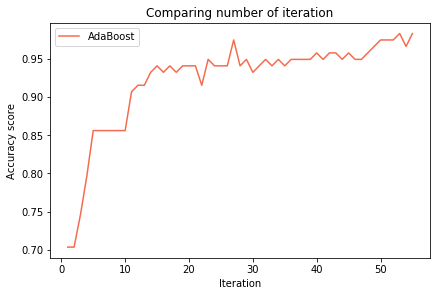

In [146]:
clfs,bs = workWith(pd.read_csv("data/chips.csv"))

![SegmentLocal](chips.gif)


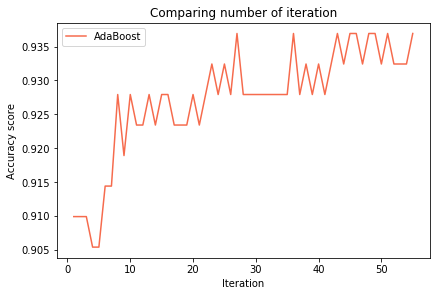

In [142]:
_,_ = workWith(pd.read_csv("data/geyser.csv"),max_depth=3)

![SegmentLocal](geyser.gif)


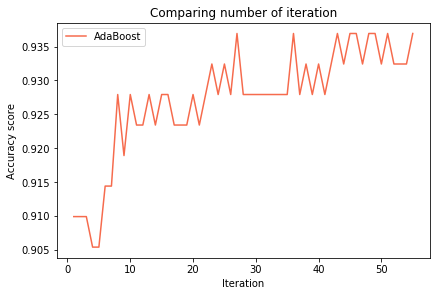

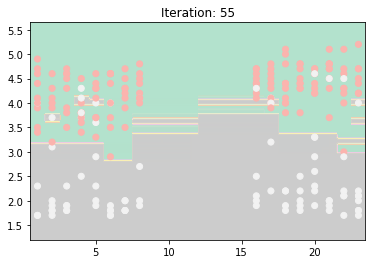

In [147]:
clfs,bs = workWith(pd.read_csv("data/geyser.csv"),max_depth=3)
data = pd.read_csv("data/geyser.csv")
data['class']= data['class'].replace({'N': -1, 'P': 1})
h=0.05
x_min, x_max = data['x'].min() - 0.5, data['x'].max() + 0.5
y_min, y_max = data['y'].min() - 0.5, data['y'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.asarray(data.drop('class',axis=True))
Y = np.asarray(data['class'])
for i in range(1,56):
    Z=np.sign(sum([b*clf.predict((np.c_[xx.ravel(), yy.ravel()])) for b,clf in zip(bs,clfs[:i])]))
    Z=np.asarray(Z).reshape(xx.shape)

    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.8)
    plt.scatter(data['x'], data['y'], c=data['class'], cmap='Pastel1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Iteration: " + str(i))
    plt.savefig(str(i)+"gif.png")

In [97]:
plt.colors

<function matplotlib.pyplot.colors()>